<img src="img/banniere.jpg" />

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 

from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import des donnees:
billets_df = pd.read_csv("datas/billets_complet.csv", sep = ',')

In [3]:
# Extraire les donnees d'expression sans les étiquette
X = billets_df.iloc[:, 1:]
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# Etiquettes des échantillons
y = billets_df['is_genuine']
print('y : ',y.shape,y.unique())

y :  (1500,) [ True False]


## Appliquer une normalisation centrée-réduite

In [5]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
print('X_scaled',X_scaled.shape)

X_scaled (1500, 6)


## Définir les couleurs pour chaque classe

In [6]:
class_color = {True: 'darkslateblue', False : 'darkred'}
y_color = [class_color[c] for c in y]


## Réaliser un clustering hiérarchique

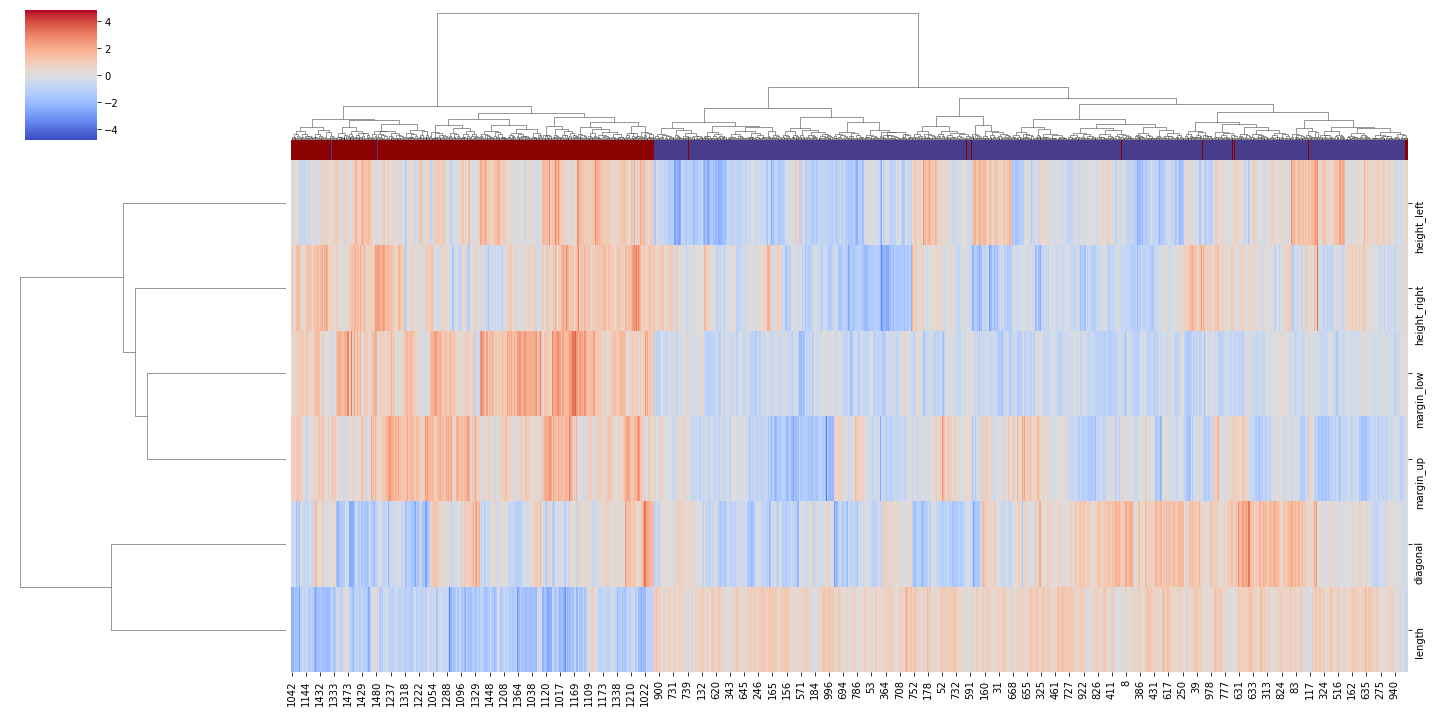

In [7]:
metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(20, 10), metric=metric, method=method, cmap=cmap, 
                             row_cluster=True, col_cluster=True, col_colors=y_color,
                             center=0.0, vmin=-4.8, vmax=4.8)
# plt.savefig('img/CAH_dfComplet.png')

CAH
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

kmeans
https://ledatascientist.com/faire-du-clustering-avec-lalgorithme-k-means/

In [8]:
billets_df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


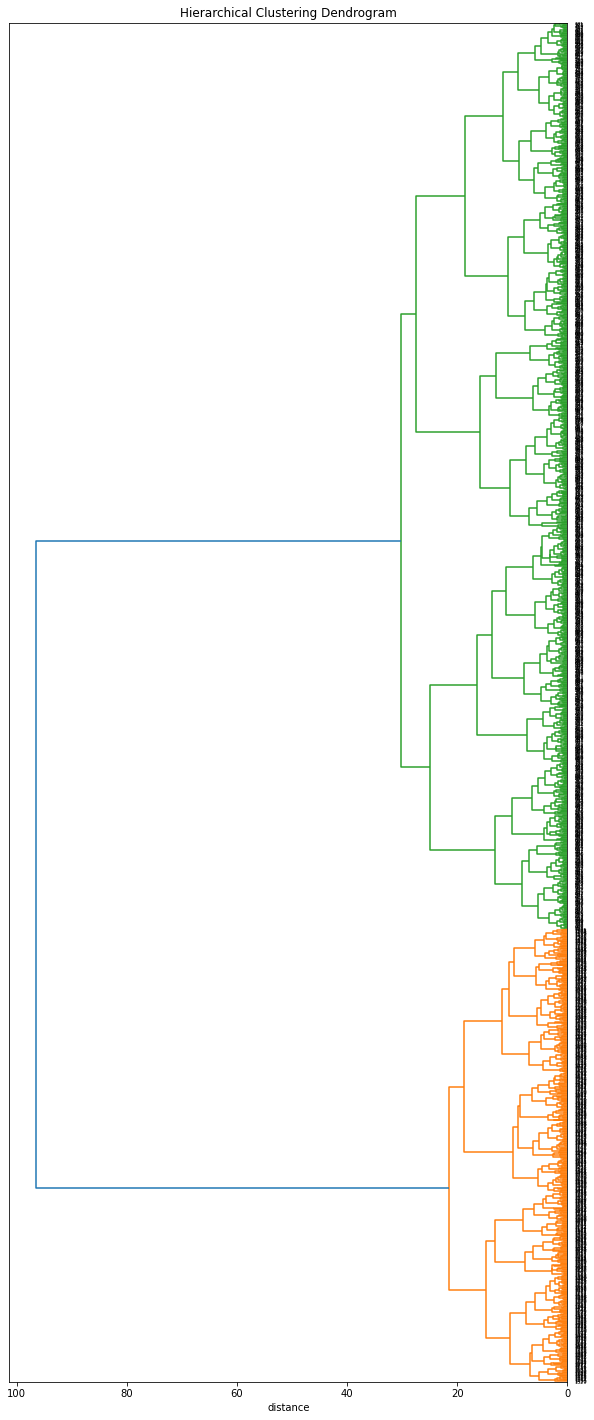

In [9]:
from functions_ACP import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

data = billets_df

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

# plt.savefig('img/CAH_dfComplet2.png')

In [10]:
# Coupage du dendrogramme en 2 clusters
clusters = fcluster(Z, 2, criterion='maxclust')

In [11]:
# Création du df de test 
cluster_df = billets_df

In [12]:
# création d'une colonne 
cluster_df["cluster_cah"] = fcluster(Z, 2, criterion='maxclust')
cluster_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_cah
0,True,171.81,104.86,104.95,4.52,2.89,112.83,2
1,True,171.46,103.36,103.66,3.77,2.99,113.09,2
2,True,172.69,104.48,103.50,4.40,2.94,113.16,2
3,True,171.36,103.91,103.94,3.62,3.01,113.51,2
4,True,171.73,104.28,103.46,4.04,3.48,112.54,2
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,1
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,1
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,1
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,1


In [13]:
cluster_df.pivot_table(index="is_genuine", columns="cluster_cah", aggfunc=len, fill_value=0)

diagonal       height_left       height_right       length        \
cluster_cah        1     2           1     2            1     2      1     2   
is_genuine                                                                     
False            500     0         500     0          500     0    500     0   
True               0  1000           0  1000            0  1000      0  1000   

            margin_low       margin_up        
cluster_cah          1     2         1     2  
is_genuine                                    
False              500     0       500     0  
True                 0  1000         0  1000

In [14]:
cluster_df = cluster_df.drop(columns = ['cluster_cah'])
print(cluster_df)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113